### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from sklearn.preprocessing import OneHotEncoder

### Reading Dataset --> "business.csv"

In [2]:
cwd = os.getcwd()

folder_name = "data"

# Dataset contains flight information and prices
file_name = "business.csv"

file_p = os.path.join(cwd, folder_name, file_name)

data = pd.read_csv(file_p)

### Dataset First-View and Summary Statistics

In [3]:
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [5]:
data.describe()

,num_code
count,93487.000000
mean,780.056147
std,147.616038
min,401.000000
25%,706.000000
50%,820.000000
75%,874.000000
max,996.000000


### Missing Value Check

In [6]:
data.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

### Features Distribution Visualization

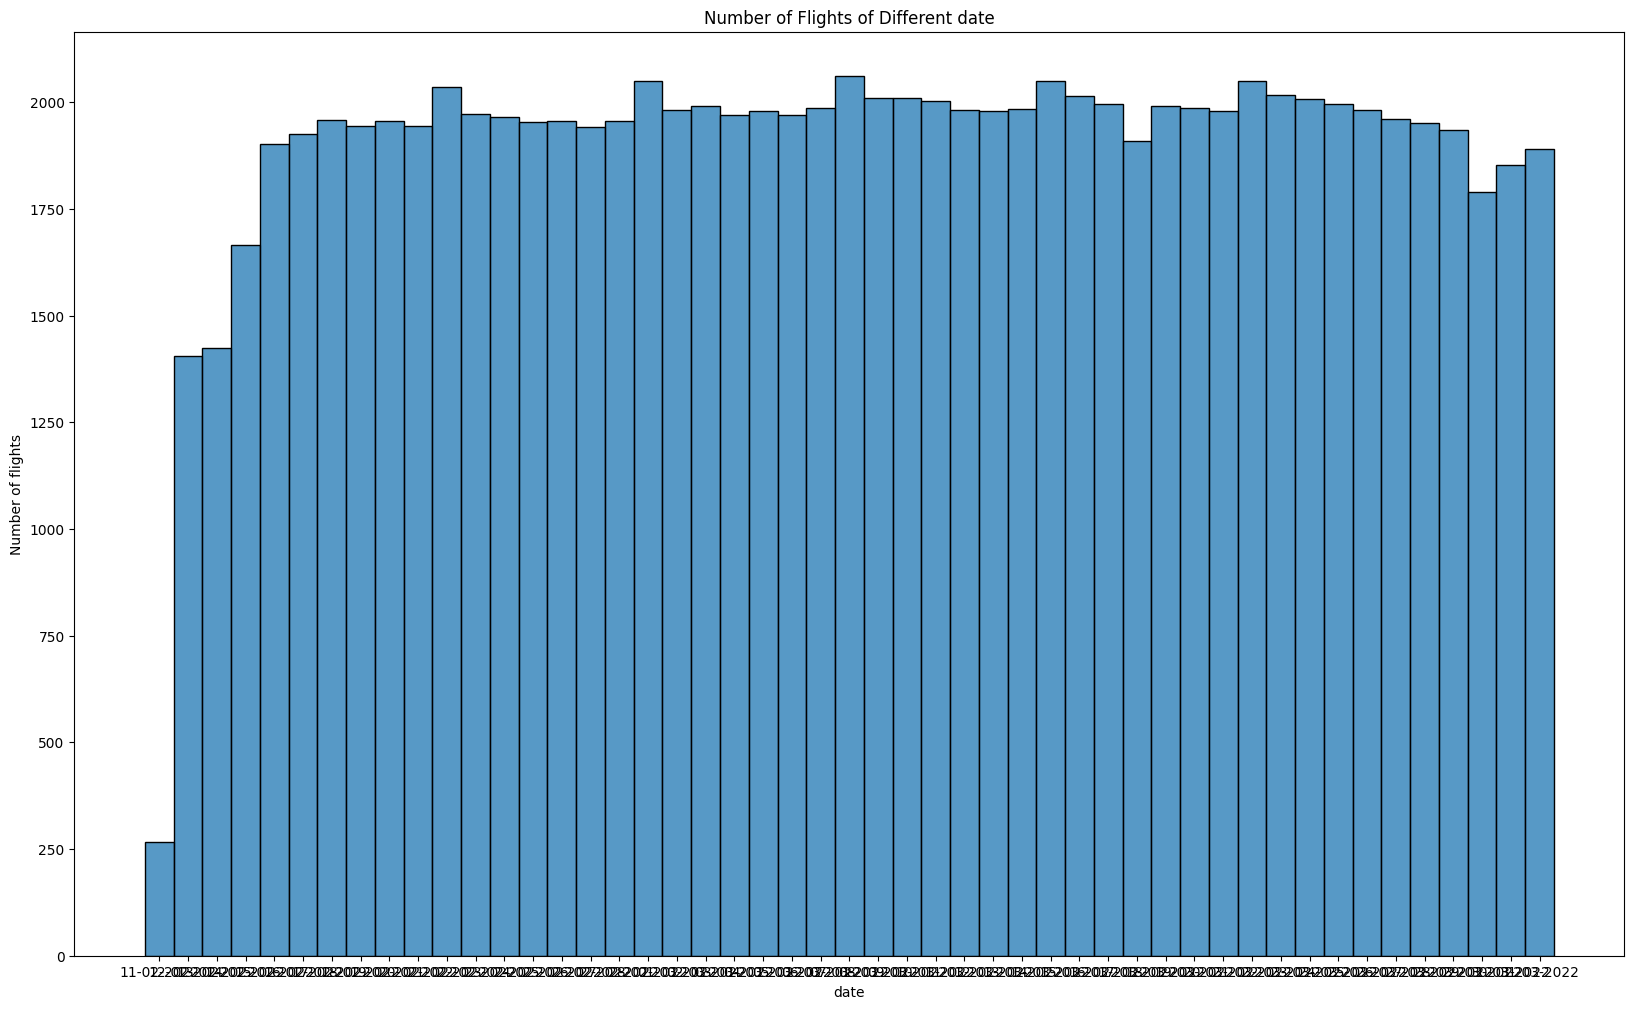

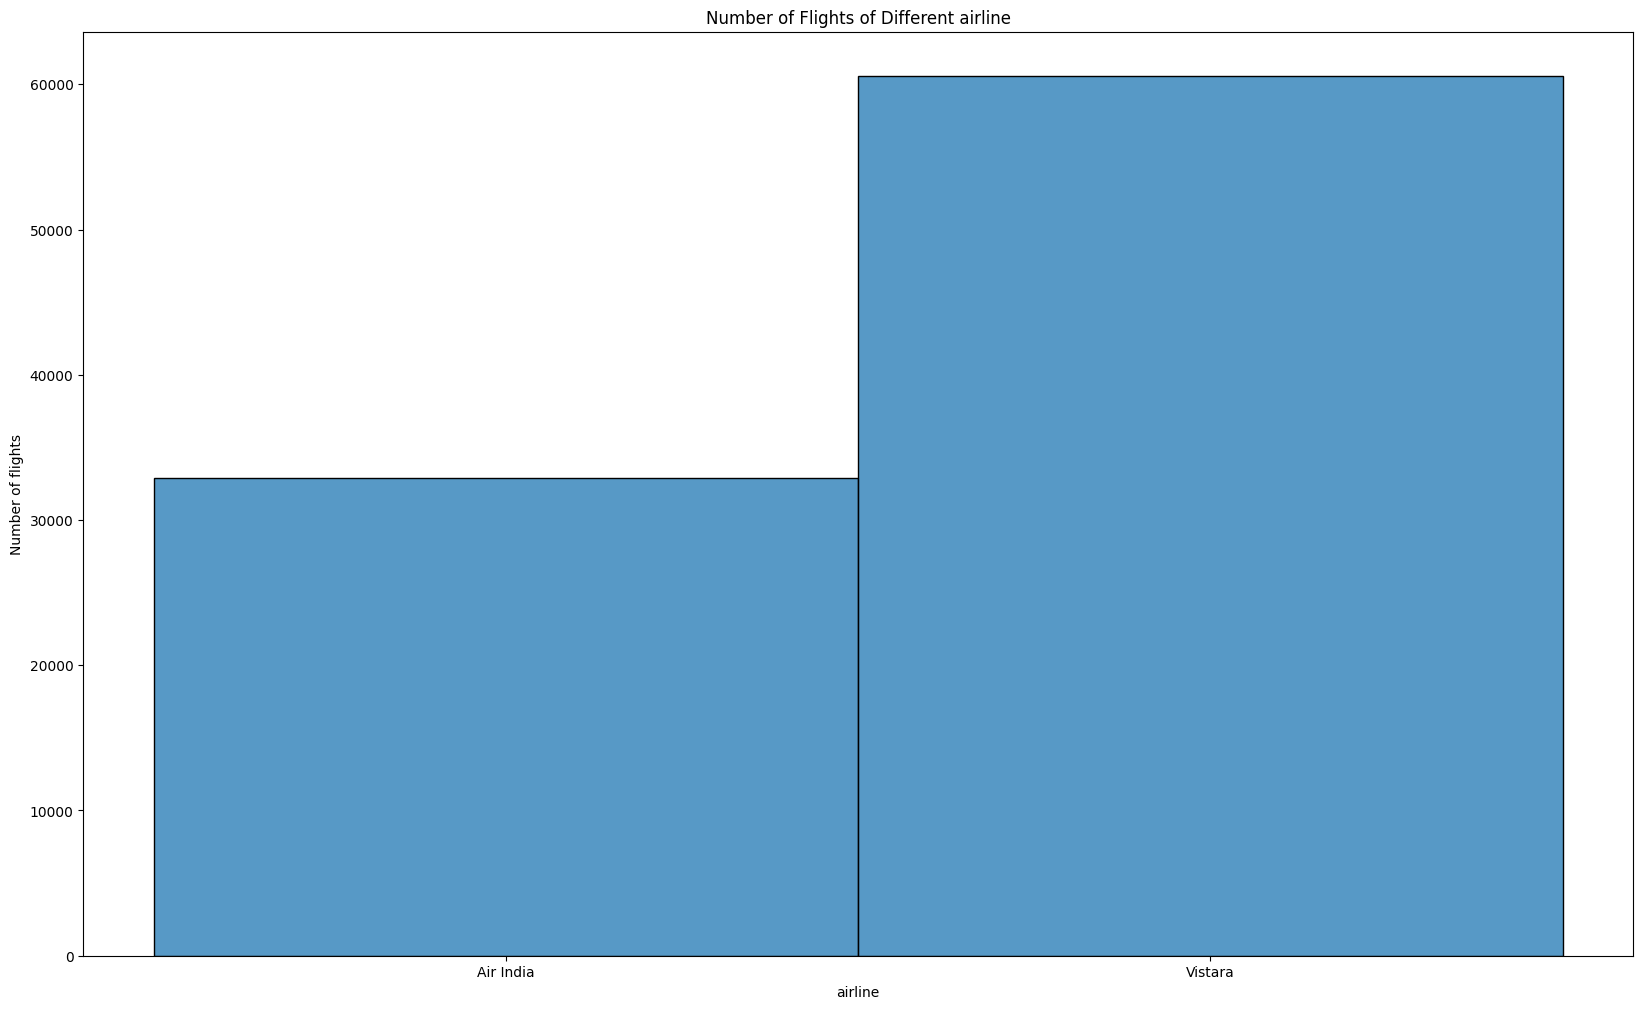

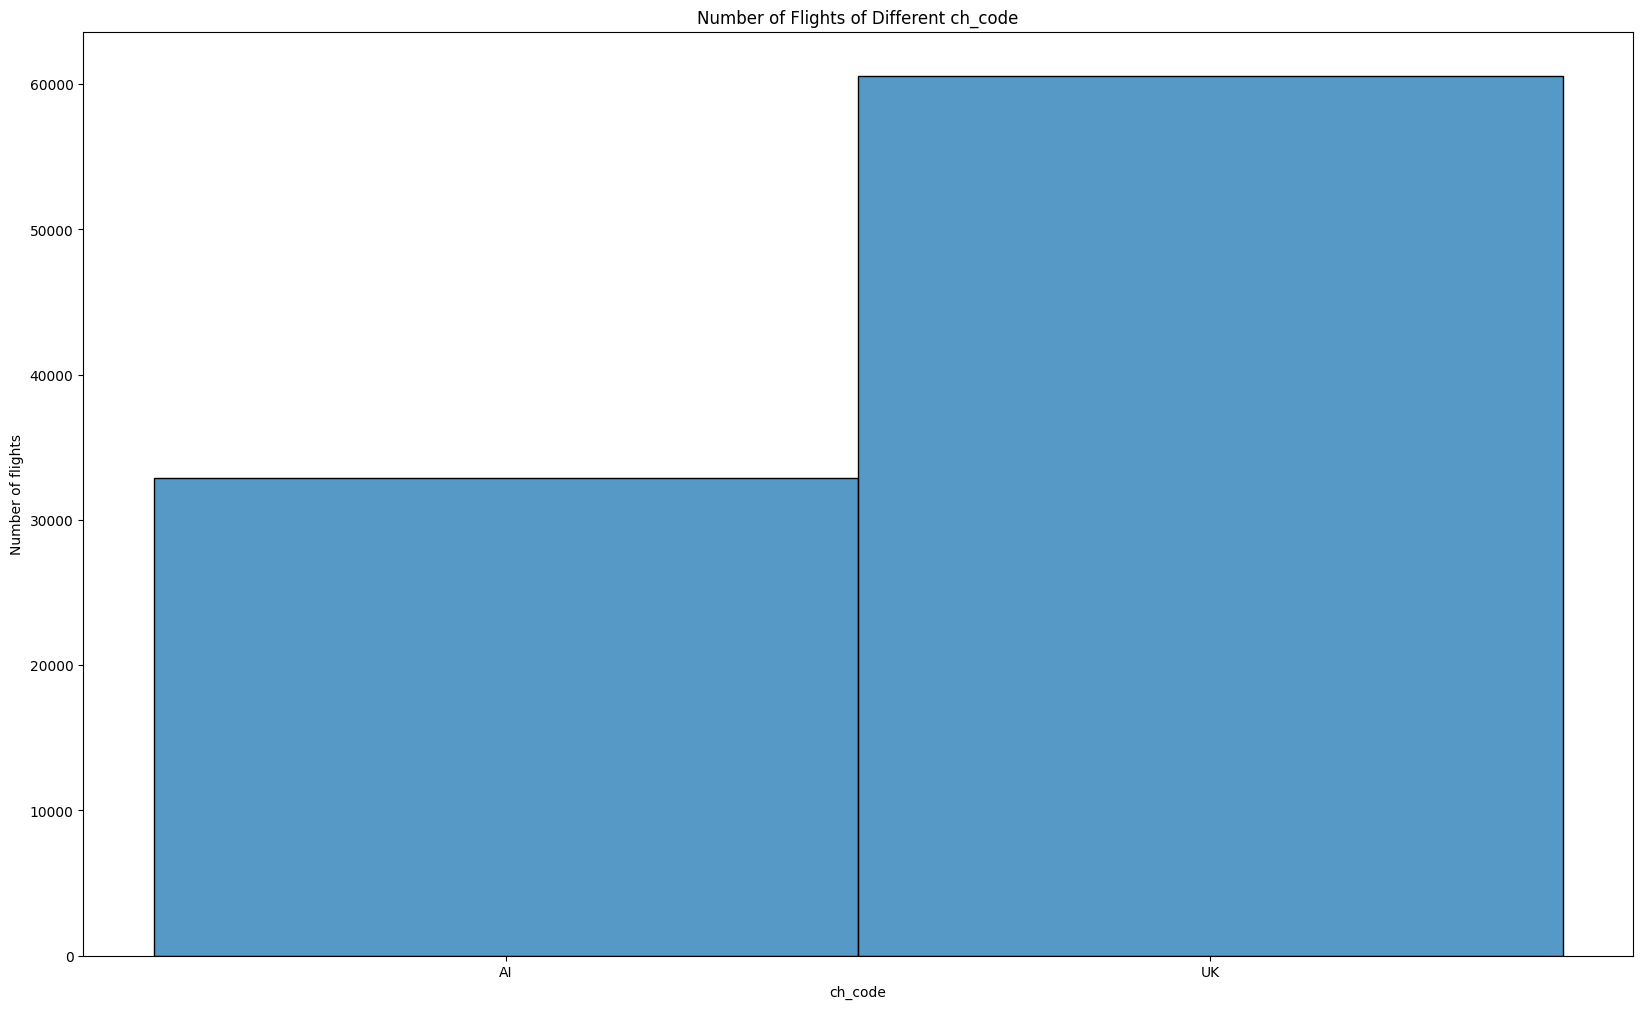

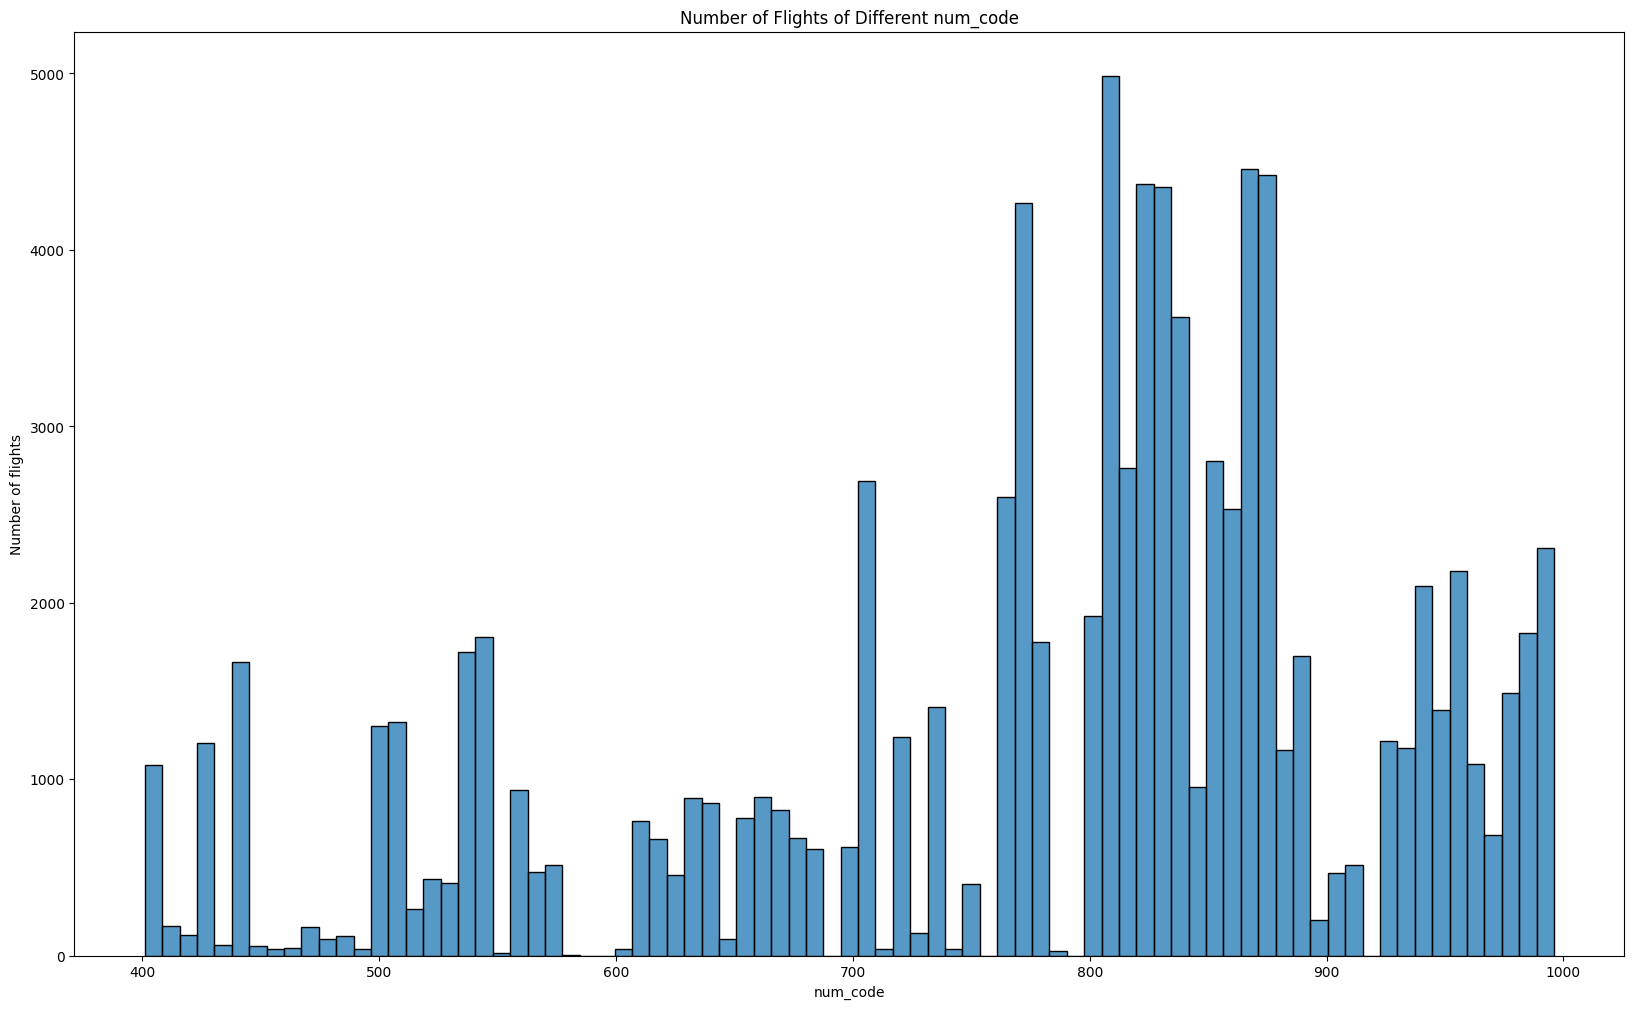

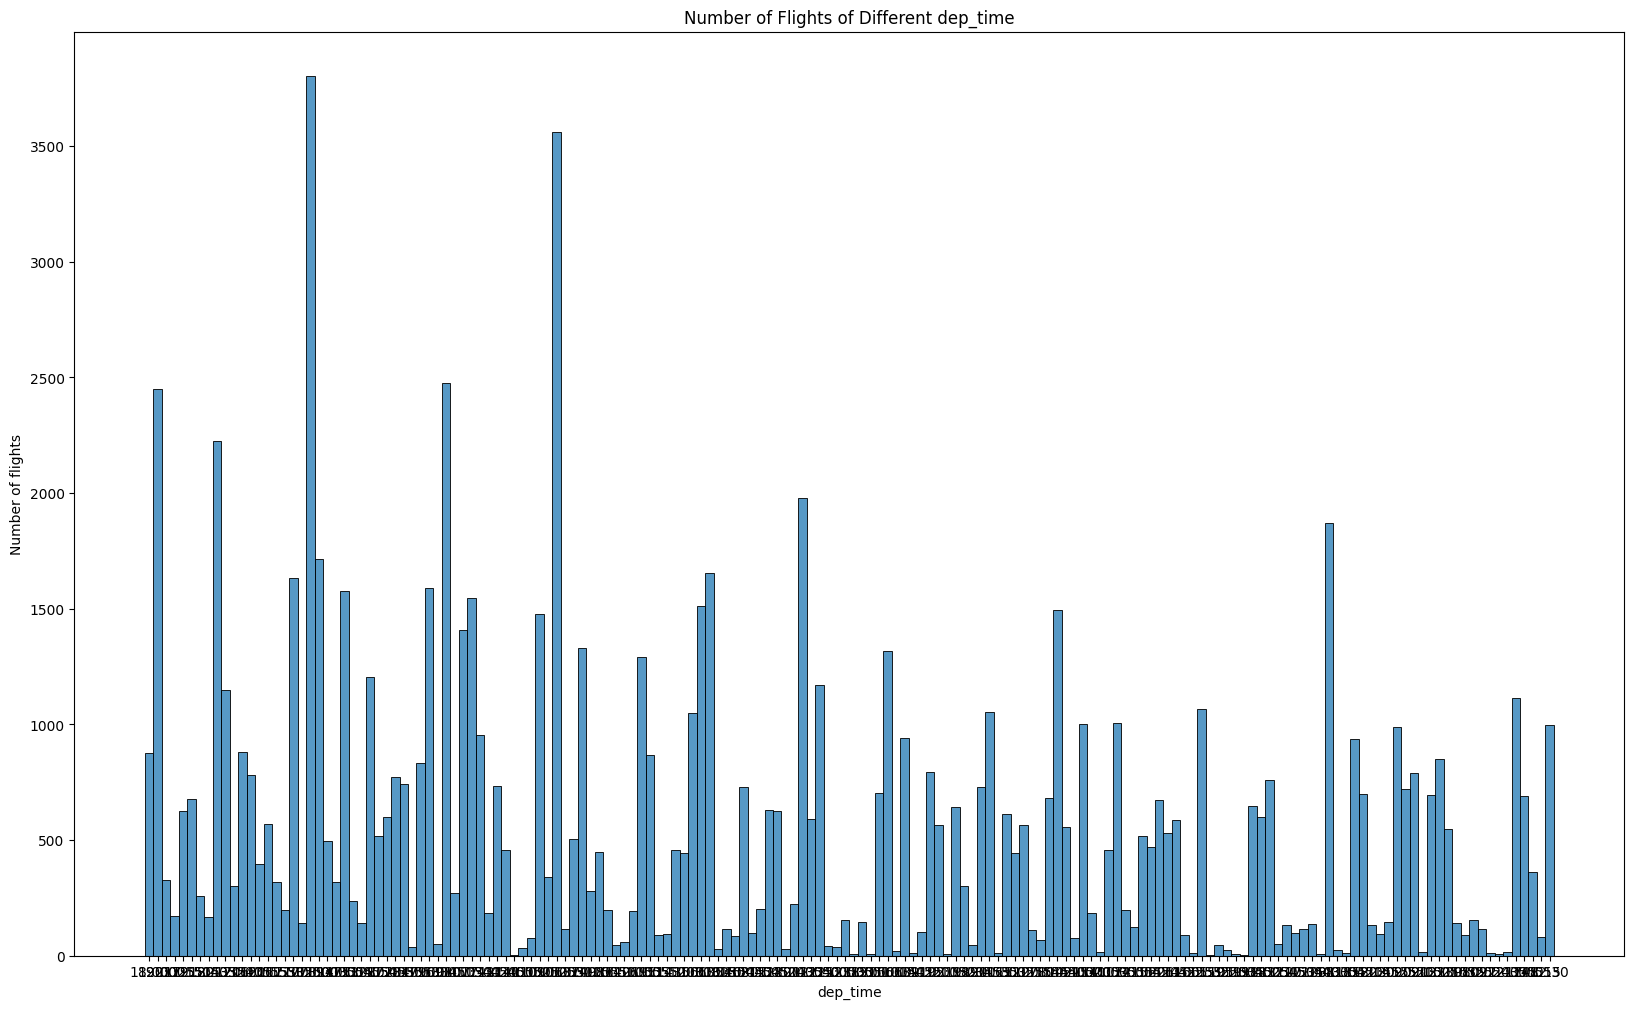

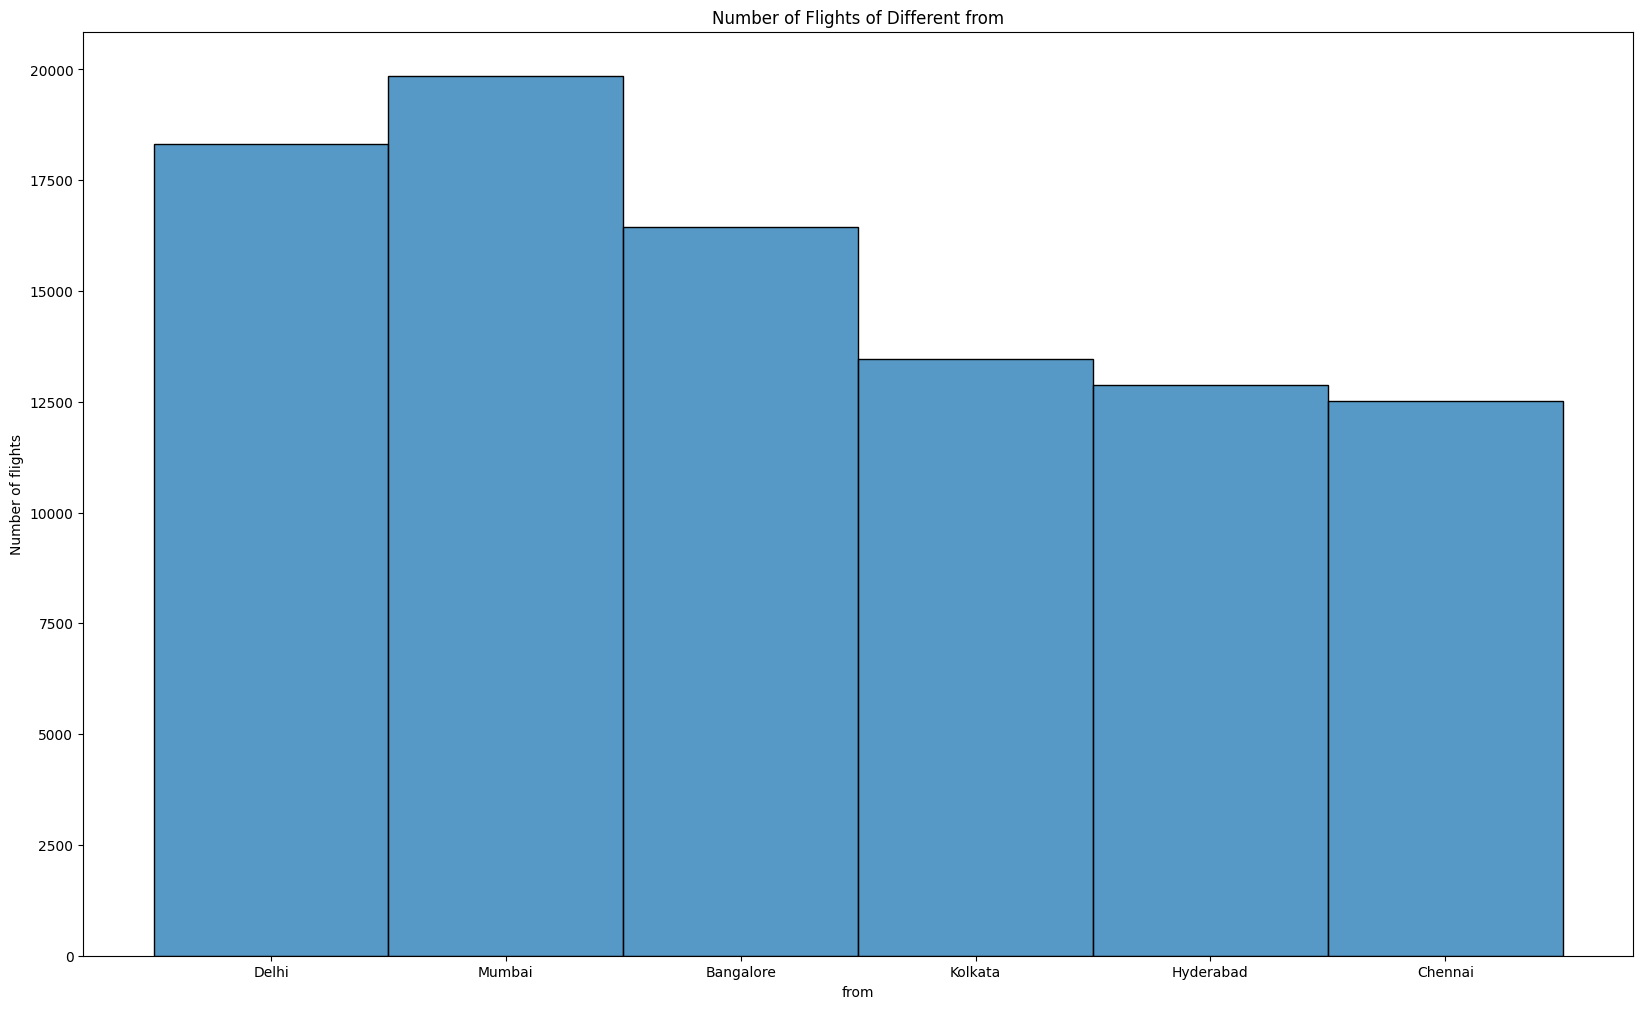

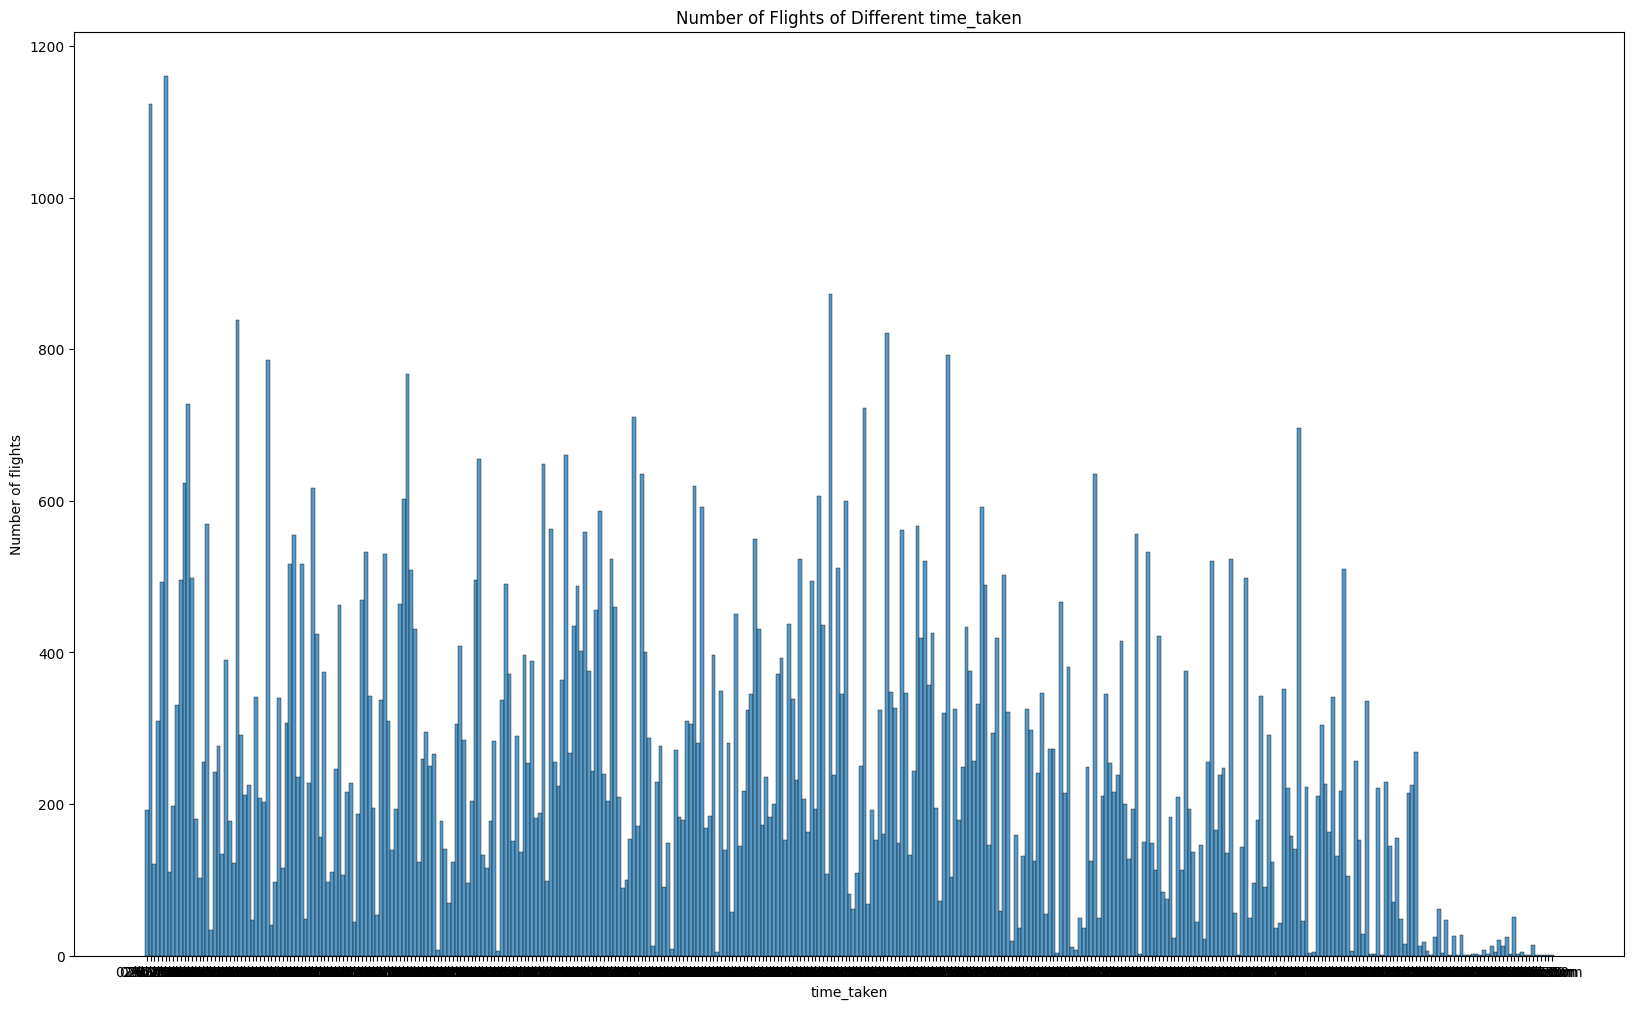

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


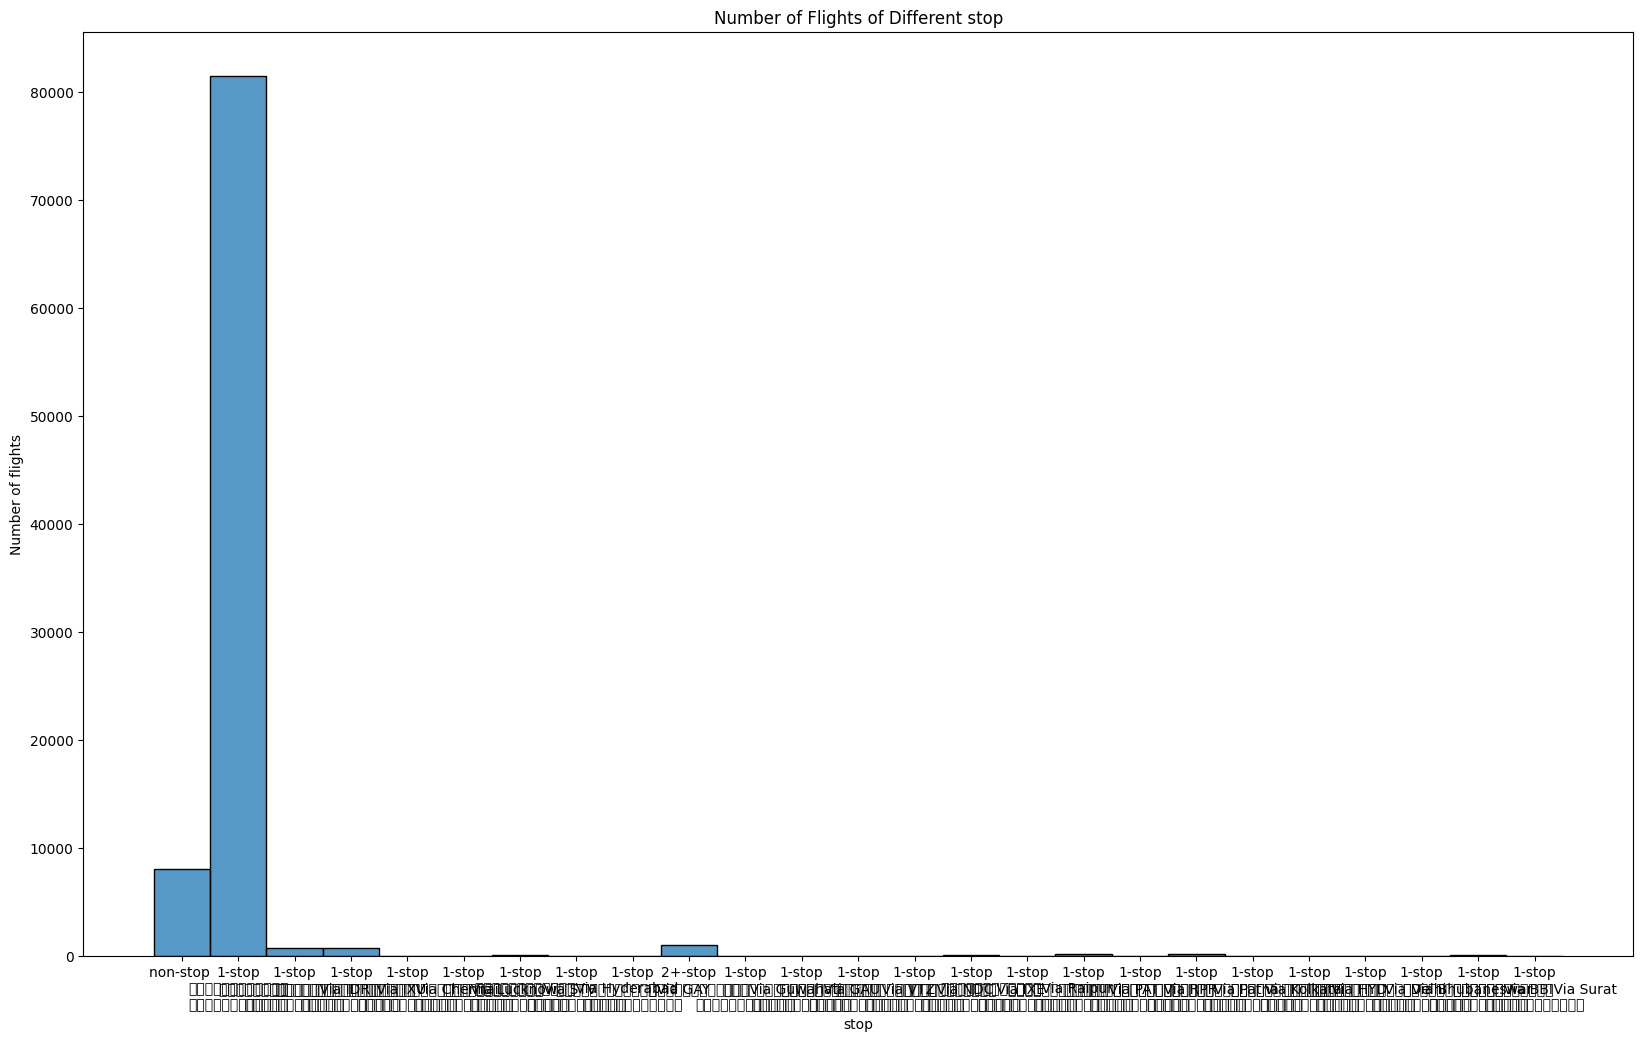

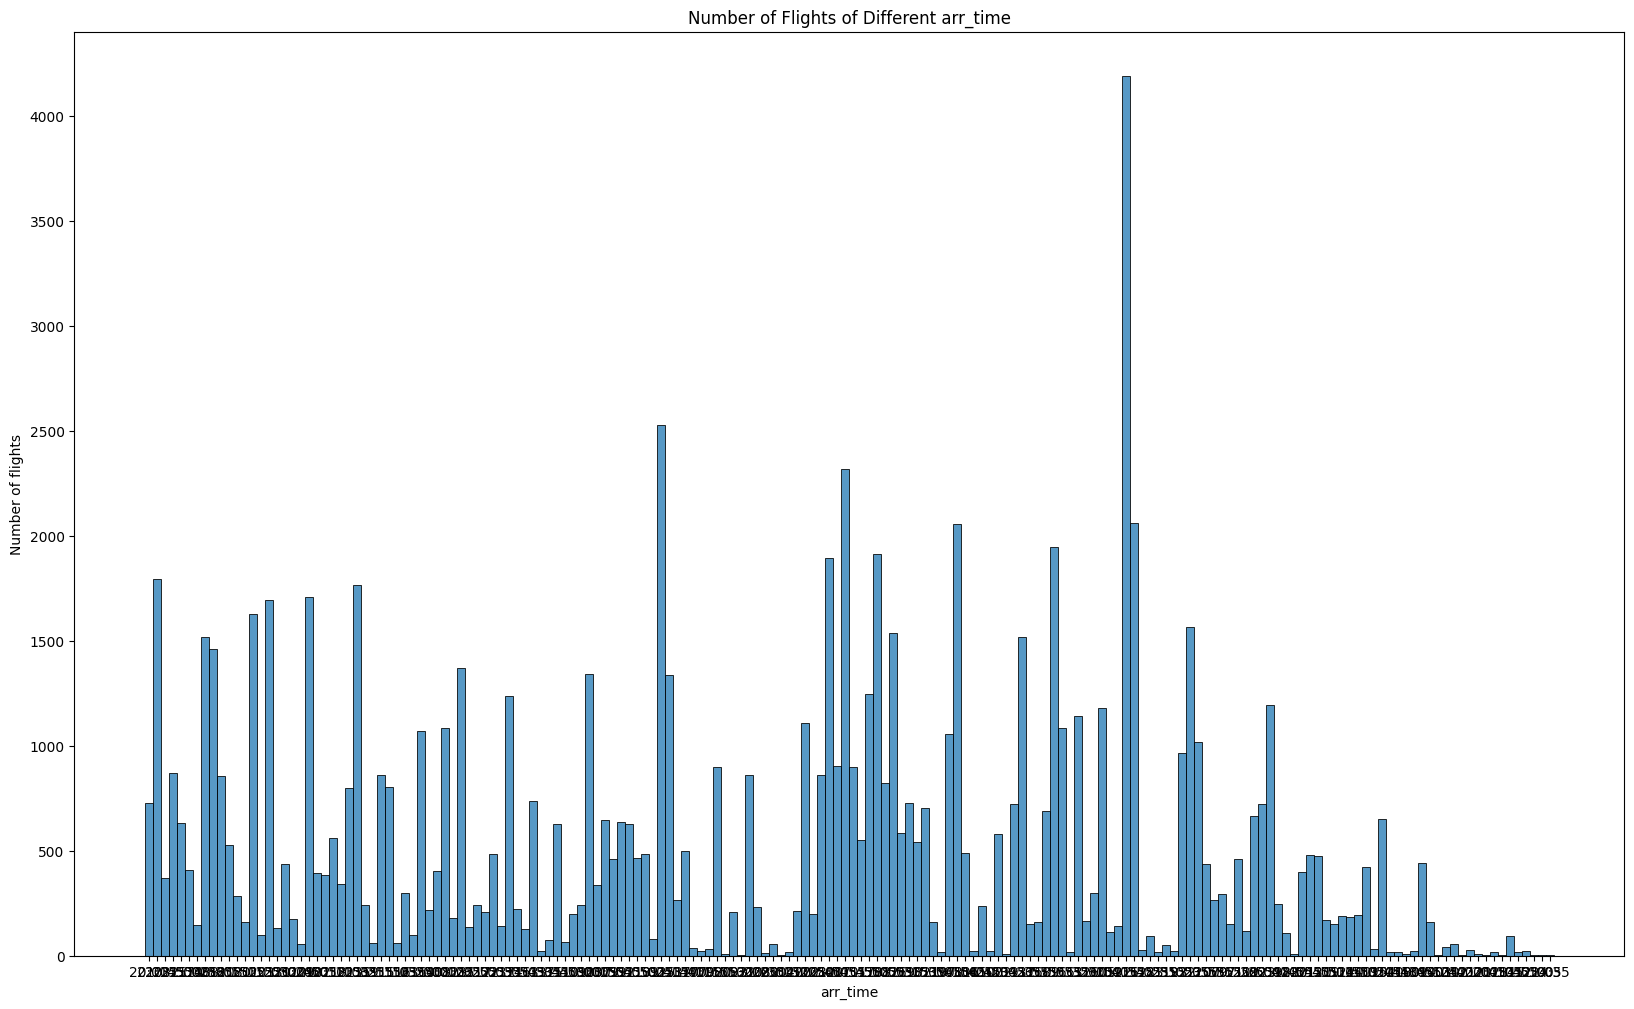

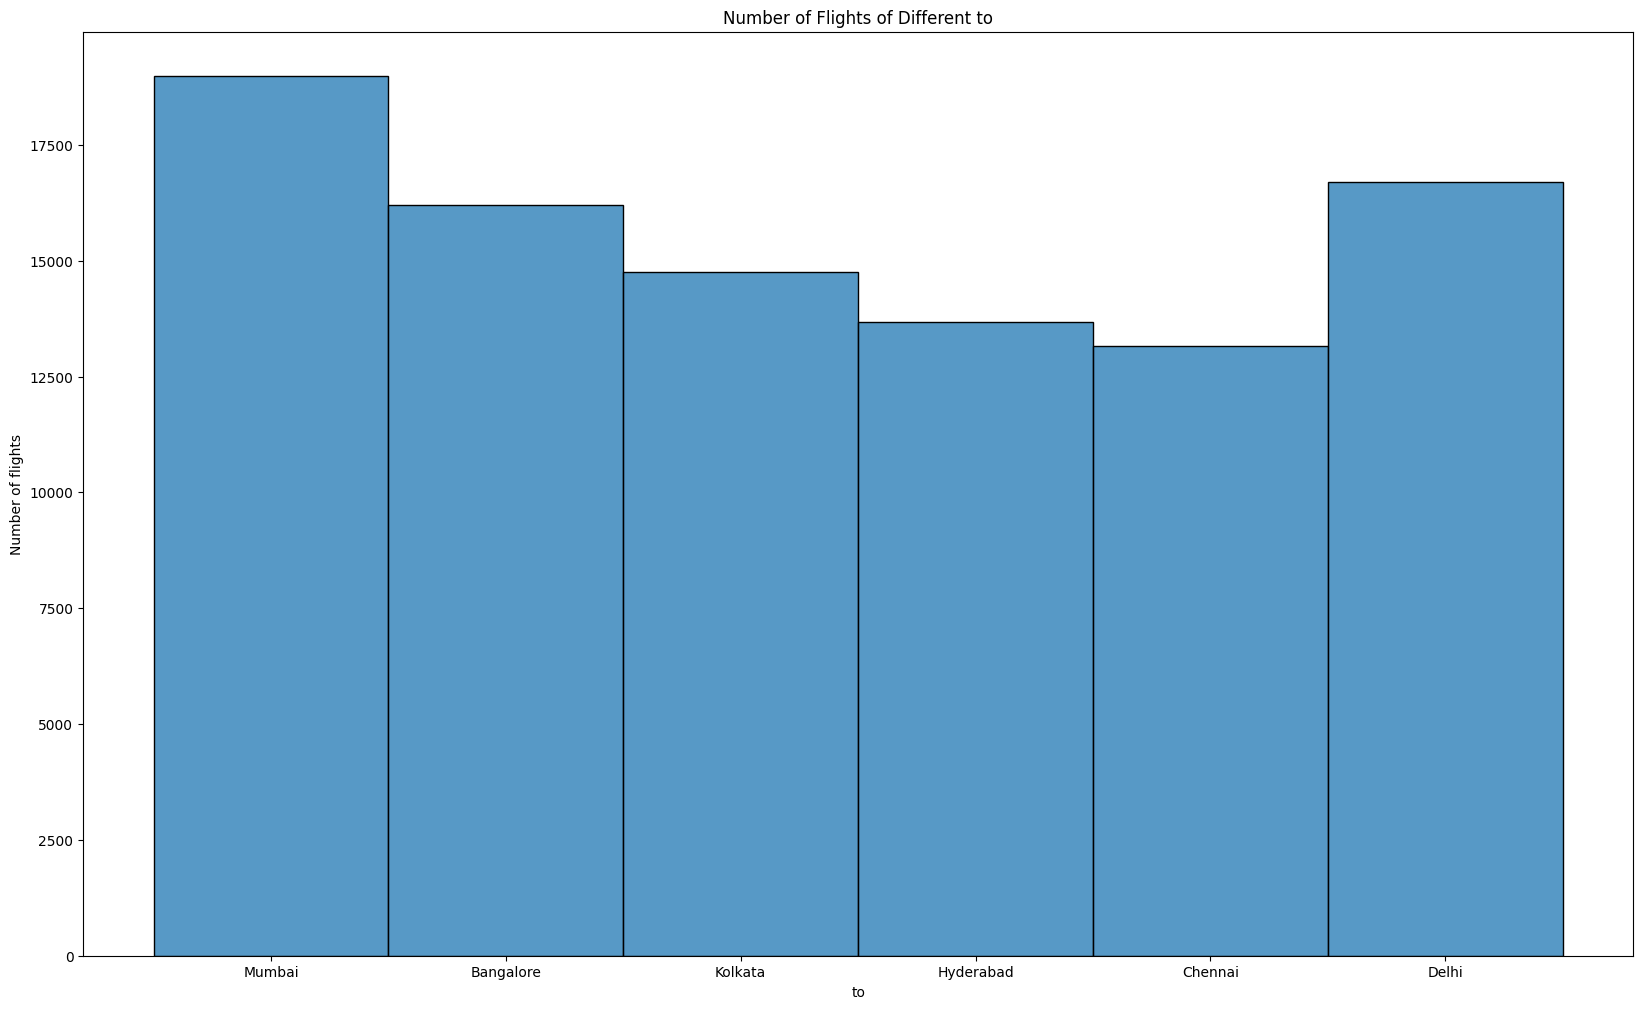

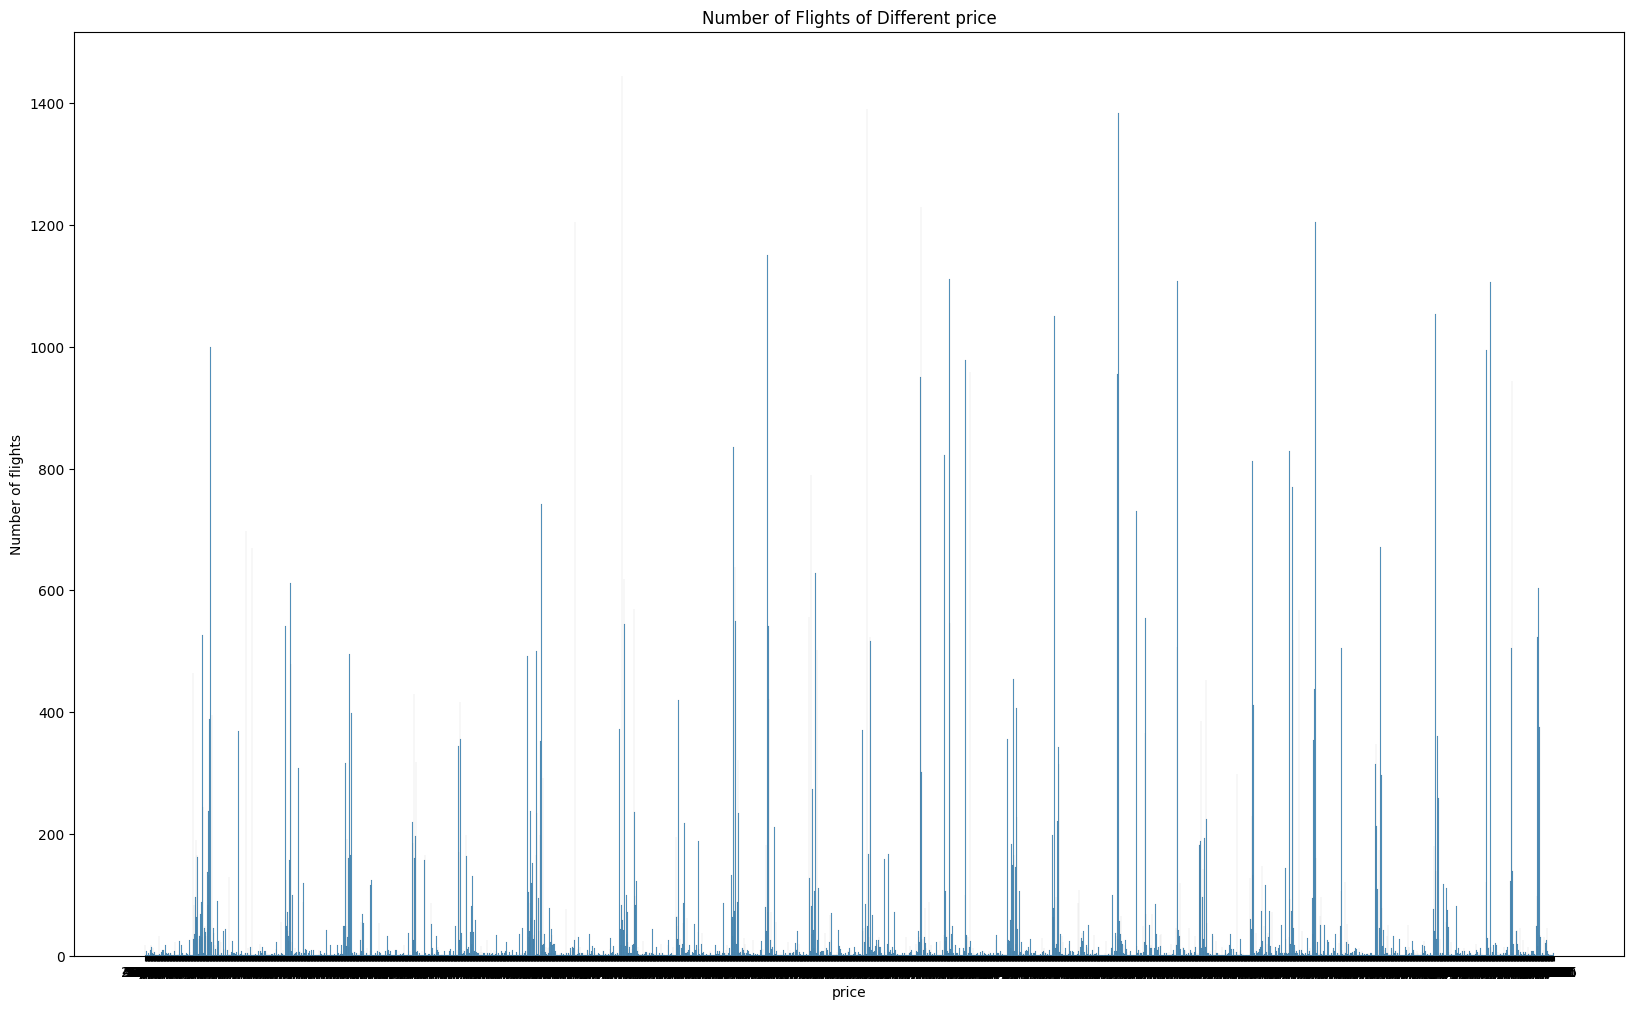

In [7]:
column_labels = data.columns.tolist()

for column_name in column_labels:
    fig = plt.figure(figsize=(20,12))
    
    sns.histplot(data=data, x=column_name)

    graph_title = "Number of Flights of Different " + column_name

    plt.ylabel("Number of flights")
    plt.xlabel(column_name)
    plt.title(graph_title)
    plt.show()

### What Features to Drop
> 1. Airplane flight character code ('ch_code') --> Airplane flight codes are just for plane identification purposes
>
> 2. Airplane flight number code    ('num_code') --> Airplane flight codes are just for plane identification purposes
>
> 3. Airplane flight arrival time   ('arr_time') --> Airplane flight arrival time on this dataset could be deduced from takeoff time and flight duration. Waste of resources to focus onto.

### Droping Features

In [8]:
data = data.drop('ch_code', axis=1)
data = data.drop('num_code', axis=1)
data = data.drop('arr_time', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   dep_time    93487 non-null  object
 3   from        93487 non-null  object
 4   time_taken  93487 non-null  object
 5   stop        93487 non-null  object
 6   to          93487 non-null  object
 7   price       93487 non-null  object
dtypes: object(8)
memory usage: 5.7+ MB


### Convert Feature 'date' Into Better Formats for Processing

In [9]:
# Convert to datetime format

data['date'] = pd.to_datetime(data['date'], dayfirst=True)

print(data['date'].dtype)  

datetime64[ns]


In [10]:
print(data['date'].iloc[:10])

0   2022-02-11
1   2022-02-11
2   2022-02-11
3   2022-02-11
4   2022-02-11
5   2022-02-11
6   2022-02-11
7   2022-02-11
8   2022-02-11
9   2022-02-11
Name: date, dtype: datetime64[ns]


### Create Columns of Day of Week, Week of Year, Seasonality and Year from Feature 'date'

In [11]:
# Day of the week (0 = Monday --> 6 = Sunday)
data['Day of Week'] = data['date'].dt.day_of_week

print(f"Type of data: {type(data['Day of Week'])}\n")
print(data['Day of Week'].head())


Type of data: <class 'pandas.core.series.Series'>

0    4
1    4
2    4
3    4
4    4
Name: Day of Week, dtype: int32


In [12]:
# Week of the Year (0 --> 52)
data['Week of Year'] = data['date'].dt.isocalendar().week

data['Week of Year'] = data['Week of Year'].astype('int32')

print(f"Type of data: {type(data['Week of Year'])}\n")
print(data['Week of Year'].head())

Type of data: <class 'pandas.core.series.Series'>

0    6
1    6
2    6
3    6
4    6
Name: Week of Year, dtype: int32


In [13]:
# Seasonality (1 = Spring, 2 = Summer, 3 = Autumm, 4 = Winter)
data['Seasonality'] = data['date'].dt.quarter

print(f"Type of data: {type(data['Seasonality'])}\n")
print(data['Seasonality'].head())

Type of data: <class 'pandas.core.series.Series'>

0    1
1    1
2    1
3    1
4    1
Name: Seasonality, dtype: int32


In [14]:
# Year
data['Year'] = data['date'].dt.year

print(f"Type of data: {type(data['Year'])}\n")
print(data['Year'].head())

Type of data: <class 'pandas.core.series.Series'>

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int32


In [15]:
data = data.drop('date', axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       93487 non-null  object
 1   dep_time      93487 non-null  object
 2   from          93487 non-null  object
 3   time_taken    93487 non-null  object
 4   stop          93487 non-null  object
 5   to            93487 non-null  object
 6   price         93487 non-null  object
 7   Day of Week   93487 non-null  int32 
 8   Week of Year  93487 non-null  int32 
 9   Seasonality   93487 non-null  int32 
 10  Year          93487 non-null  int32 
dtypes: int32(4), object(7)
memory usage: 6.4+ MB


### Reformating Departure Time ('dep_time') to Datetime Format

In [17]:
data['dep_time'] = pd.to_datetime(data['dep_time'])

print(data['dep_time'].dtype)  

print(f"\n{data['dep_time'].iloc[:10]}")

datetime64[ns]

0   2025-11-07 18:00:00
1   2025-11-07 19:00:00
2   2025-11-07 20:00:00
3   2025-11-07 21:25:00
4   2025-11-07 17:15:00
5   2025-11-07 19:50:00
6   2025-11-07 21:15:00
7   2025-11-07 18:40:00
8   2025-11-07 20:35:00
9   2025-11-07 19:00:00
Name: dep_time, dtype: datetime64[ns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19948\1952536957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_time'] = pd.to_datetime(data['dep_time'])


### Extract Feature 'dep_time' into Hour and Minutes

In [18]:
data['Dep Hour'] = data['dep_time'].dt.hour

print(f"Type of data: {type(data['Dep Hour'])}\n")
print(data['Dep Hour'].head())

Type of data: <class 'pandas.core.series.Series'>

0    18
1    19
2    20
3    21
4    17
Name: Dep Hour, dtype: int32


In [19]:
data['Dep Minute'] = data['dep_time'].dt.minute

print(f"Type of data: {type(data['Dep Minute'])}\n")
print(data['Dep Minute'].head())

Type of data: <class 'pandas.core.series.Series'>

0     0
1     0
2     0
3    25
4    15
Name: Dep Minute, dtype: int32


In [20]:
data = data.drop('dep_time', axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       93487 non-null  object
 1   from          93487 non-null  object
 2   time_taken    93487 non-null  object
 3   stop          93487 non-null  object
 4   to            93487 non-null  object
 5   price         93487 non-null  object
 6   Day of Week   93487 non-null  int32 
 7   Week of Year  93487 non-null  int32 
 8   Seasonality   93487 non-null  int32 
 9   Year          93487 non-null  int32 
 10  Dep Hour      93487 non-null  int32 
 11  Dep Minute    93487 non-null  int32 
dtypes: int32(6), object(6)
memory usage: 6.4+ MB


### "Stop" features Has Too Much Groups 

In [22]:
stop_labels = data['stop'].unique()

stop_labels = stop_labels.tolist()

print(stop_labels)

print(f"\nNumber of groups: {len(stop_labels)}")

['non-stop ', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t', '2+-stop', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t', '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\

### Reformating "Stop"Variable to be only of 3 types

In [23]:
# Reformat the entries of feature 'stop' into only 3 types
"""
Num stops: 0, 1, 2+
"""

new_stop_labels = ["0", "1", "2++"]

non_stop_labels = ["non-stop "]

stop_labels.remove('non-stop ')
stop_labels.remove('2+-stop')

one_stop_labels = stop_labels
two_stop_labels = ["2+-stop"]

temp_list = []

for i in range(0, len(data)):

    temp_stop_data = data.loc[i, 'stop']

    if temp_stop_data in non_stop_labels:
        temp_list.append(new_stop_labels[0])

    elif temp_stop_data in two_stop_labels:
        temp_list.append(new_stop_labels[2])
        
    else:
        temp_list.append(new_stop_labels[1])

stop_df = pd.DataFrame(temp_list, columns=['Stop'])

# Convert to datatype of int32
stop_df = stop_df.astype('object')

data = pd.concat([data, stop_df], axis=1)

data = data.drop('stop', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       93487 non-null  object
 1   from          93487 non-null  object
 2   time_taken    93487 non-null  object
 3   to            93487 non-null  object
 4   price         93487 non-null  object
 5   Day of Week   93487 non-null  int32 
 6   Week of Year  93487 non-null  int32 
 7   Seasonality   93487 non-null  int32 
 8   Year          93487 non-null  int32 
 9   Dep Hour      93487 non-null  int32 
 10  Dep Minute    93487 non-null  int32 
 11  Stop          93487 non-null  object
dtypes: int32(6), object(6)
memory usage: 6.4+ MB


<Axes: xlabel='Stop', ylabel='Count'>

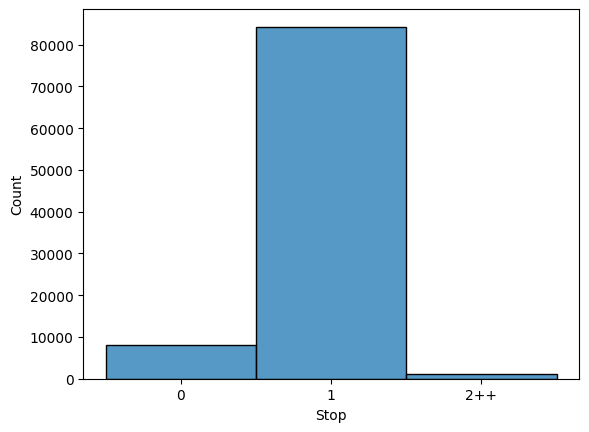

In [24]:
sns.histplot(data=data, x='Stop')

### Change Feature 'time_taken' Datatype to Only Minutes (Int32)

In [25]:
# Change datatype of 'time_taken' to int32 (hour & miutes --> minutes)

temp_list = []

for i in range(0, len(data)):

    temp_time_data = data.loc[i, 'time_taken']

    data_string = temp_time_data.split('h')

    num_hour = int(data_string[0])

    minute_string = data_string[1].split('m')

    num_minute = int(minute_string[0])

    total_min = (num_hour*60) + num_minute

    temp_list.append(total_min)

time_taken_df = pd.DataFrame(temp_list, columns=['Time Taken'])

# Convert to datatype of int32
time_taken_df = time_taken_df.astype('int32')

data = pd.concat([data, time_taken_df], axis=1)

data = data.drop('time_taken', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       93487 non-null  object
 1   from          93487 non-null  object
 2   to            93487 non-null  object
 3   price         93487 non-null  object
 4   Day of Week   93487 non-null  int32 
 5   Week of Year  93487 non-null  int32 
 6   Seasonality   93487 non-null  int32 
 7   Year          93487 non-null  int32 
 8   Dep Hour      93487 non-null  int32 
 9   Dep Minute    93487 non-null  int32 
 10  Stop          93487 non-null  object
 11  Time Taken    93487 non-null  int32 
dtypes: int32(7), object(5)
memory usage: 6.1+ MB


### Change Feature 'price' Datatype from Object to Int32

In [26]:
# Change datatype of 'price' to int32 

temp_list = []

for i in range(0, len(data)):
    temp_price_data = data.loc[i, 'price']

    num_lists = temp_price_data.split(',')

    temp_string = ""

    for num in num_lists:
        temp_num = num.replace(" ", "")
        
        temp_string = temp_string + temp_num

    numeric_price = int(temp_string)
    
    temp_list.append(numeric_price)

price_df = pd.DataFrame(temp_list, columns=['Price'])

# Convert to datatype of int32
price_df = price_df.astype('int32')

data = pd.concat([data, price_df], axis=1)

data = data.drop('price', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airline       93487 non-null  object
 1   from          93487 non-null  object
 2   to            93487 non-null  object
 3   Day of Week   93487 non-null  int32 
 4   Week of Year  93487 non-null  int32 
 5   Seasonality   93487 non-null  int32 
 6   Year          93487 non-null  int32 
 7   Dep Hour      93487 non-null  int32 
 8   Dep Minute    93487 non-null  int32 
 9   Stop          93487 non-null  object
 10  Time Taken    93487 non-null  int32 
 11  Price         93487 non-null  int32 
dtypes: int32(8), object(4)
memory usage: 5.7+ MB


### Rename Feature for Standardization

In [27]:
data.rename(columns={'airline': 'Airline',
                     'from': 'From',
                     'to': 'To'},
                     inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       93487 non-null  object
 1   From          93487 non-null  object
 2   To            93487 non-null  object
 3   Day of Week   93487 non-null  int32 
 4   Week of Year  93487 non-null  int32 
 5   Seasonality   93487 non-null  int32 
 6   Year          93487 non-null  int32 
 7   Dep Hour      93487 non-null  int32 
 8   Dep Minute    93487 non-null  int32 
 9   Stop          93487 non-null  object
 10  Time Taken    93487 non-null  int32 
 11  Price         93487 non-null  int32 
dtypes: int32(8), object(4)
memory usage: 5.7+ MB


### Rearrange Variable Columns

In [28]:
column_order = ['Airline', 'From', 'To', 'Stop', 
                'Day of Week', 'Week of Year', 'Seasonality', 'Year',
                'Dep Hour', 'Dep Minute', 'Time Taken', 'Price']

data = data[column_order]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       93487 non-null  object
 1   From          93487 non-null  object
 2   To            93487 non-null  object
 3   Stop          93487 non-null  object
 4   Day of Week   93487 non-null  int32 
 5   Week of Year  93487 non-null  int32 
 6   Seasonality   93487 non-null  int32 
 7   Year          93487 non-null  int32 
 8   Dep Hour      93487 non-null  int32 
 9   Dep Minute    93487 non-null  int32 
 10  Time Taken    93487 non-null  int32 
 11  Price         93487 non-null  int32 
dtypes: int32(8), object(4)
memory usage: 5.7+ MB


### One-Hot-Encoding for Easier Data Processing

In [29]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data[categorical_columns])

one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

data_encoded = pd.concat([data, one_hot_data], axis=1)

data_encoded = data_encoded.drop(categorical_columns, axis=1)

In [30]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day of Week        93487 non-null  int32  
 1   Week of Year       93487 non-null  int32  
 2   Seasonality        93487 non-null  int32  
 3   Year               93487 non-null  int32  
 4   Dep Hour           93487 non-null  int32  
 5   Dep Minute         93487 non-null  int32  
 6   Time Taken         93487 non-null  int32  
 7   Price              93487 non-null  int32  
 8   Airline_Air India  93487 non-null  float64
 9   Airline_Vistara    93487 non-null  float64
 10  From_Bangalore     93487 non-null  float64
 11  From_Chennai       93487 non-null  float64
 12  From_Delhi         93487 non-null  float64
 13  From_Hyderabad     93487 non-null  float64
 14  From_Kolkata       93487 non-null  float64
 15  From_Mumbai        93487 non-null  float64
 16  To_Bangalore       934

### Convert All Features' Datatype to Int32

In [31]:
data_encoded = data_encoded.astype('int32')

In [32]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Day of Week        93487 non-null  int32
 1   Week of Year       93487 non-null  int32
 2   Seasonality        93487 non-null  int32
 3   Year               93487 non-null  int32
 4   Dep Hour           93487 non-null  int32
 5   Dep Minute         93487 non-null  int32
 6   Time Taken         93487 non-null  int32
 7   Price              93487 non-null  int32
 8   Airline_Air India  93487 non-null  int32
 9   Airline_Vistara    93487 non-null  int32
 10  From_Bangalore     93487 non-null  int32
 11  From_Chennai       93487 non-null  int32
 12  From_Delhi         93487 non-null  int32
 13  From_Hyderabad     93487 non-null  int32
 14  From_Kolkata       93487 non-null  int32
 15  From_Mumbai        93487 non-null  int32
 16  To_Bangalore       93487 non-null  int32
 17  To_Chennai  

In [33]:
data_encoded.describe()

,Day of Week,Week of Year,Seasonality,Year,Dep Hour,Dep Minute,Time Taken,Price,Airline_Air India,Airline_Vistara,...,From_Mumbai,To_Bangalore,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai,Stop_0,Stop_1,Stop_2++
count,93487.000000,93487.000000,93487.0,93487.0,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,...,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000,93487.000000
mean,2.952143,9.684245,1.0,2022.0,13.290939,27.384877,822.253468,52540.081124,0.351899,0.648101,...,0.212415,0.173265,0.140747,0.178709,0.146277,0.157862,0.203141,0.086664,0.901751,0.011584
std,2.007697,1.978416,0.0,0.0,5.358745,17.707500,411.148768,12969.314606,0.477565,0.477565,...,0.409019,0.378478,0.347762,0.383111,0.353386,0.364613,0.402338,0.281344,0.297653,0.107007
min,0.000000,6.000000,1.0,2022.0,2.000000,0.000000,60.000000,12000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.0,2022.0,8.000000,10.000000,530.000000,45185.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,10.000000,1.0,2022.0,13.000000,30.000000,785.000000,53164.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,11.000000,1.0,2022.0,19.000000,45.000000,1070.000000,60396.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,13.000000,1.0,2022.0,23.000000,55.000000,2865.000000,123071.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### New Visualization of Feature Distribution

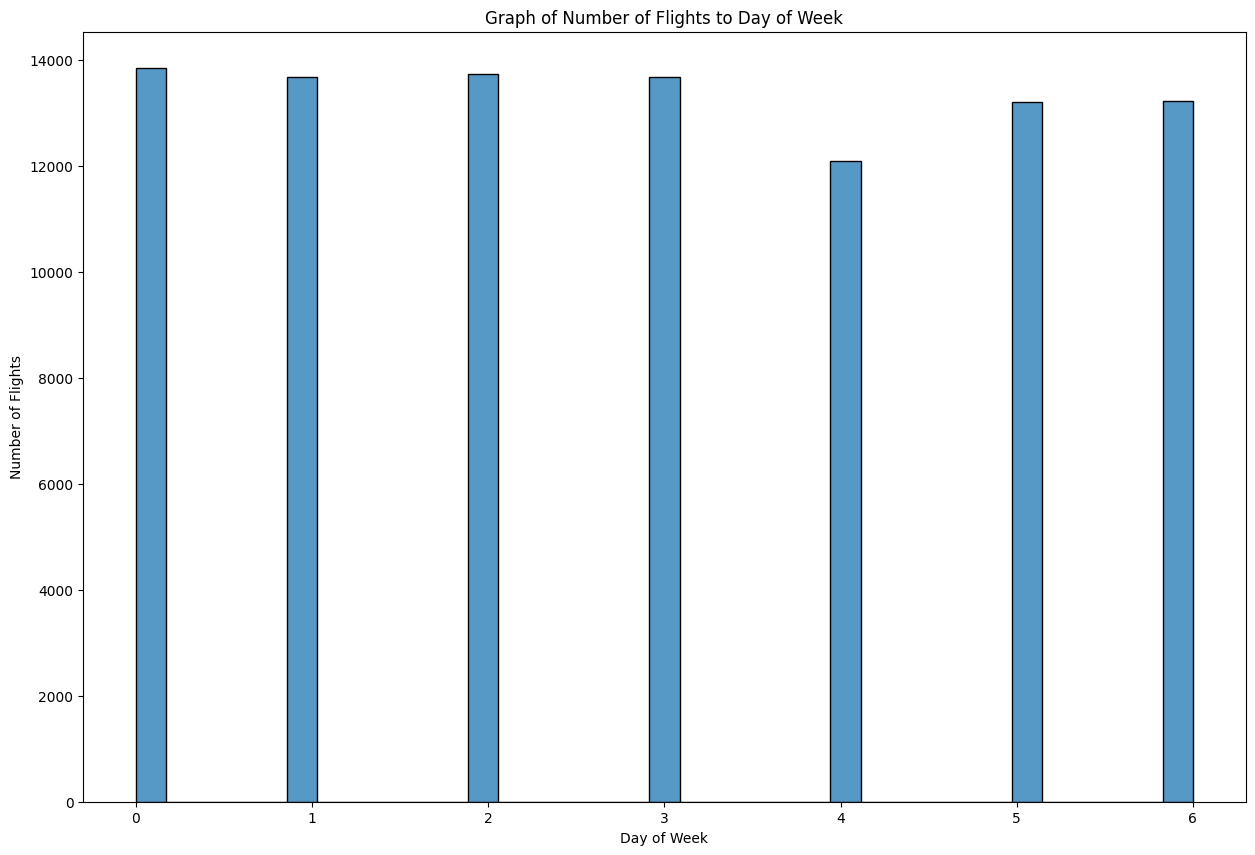

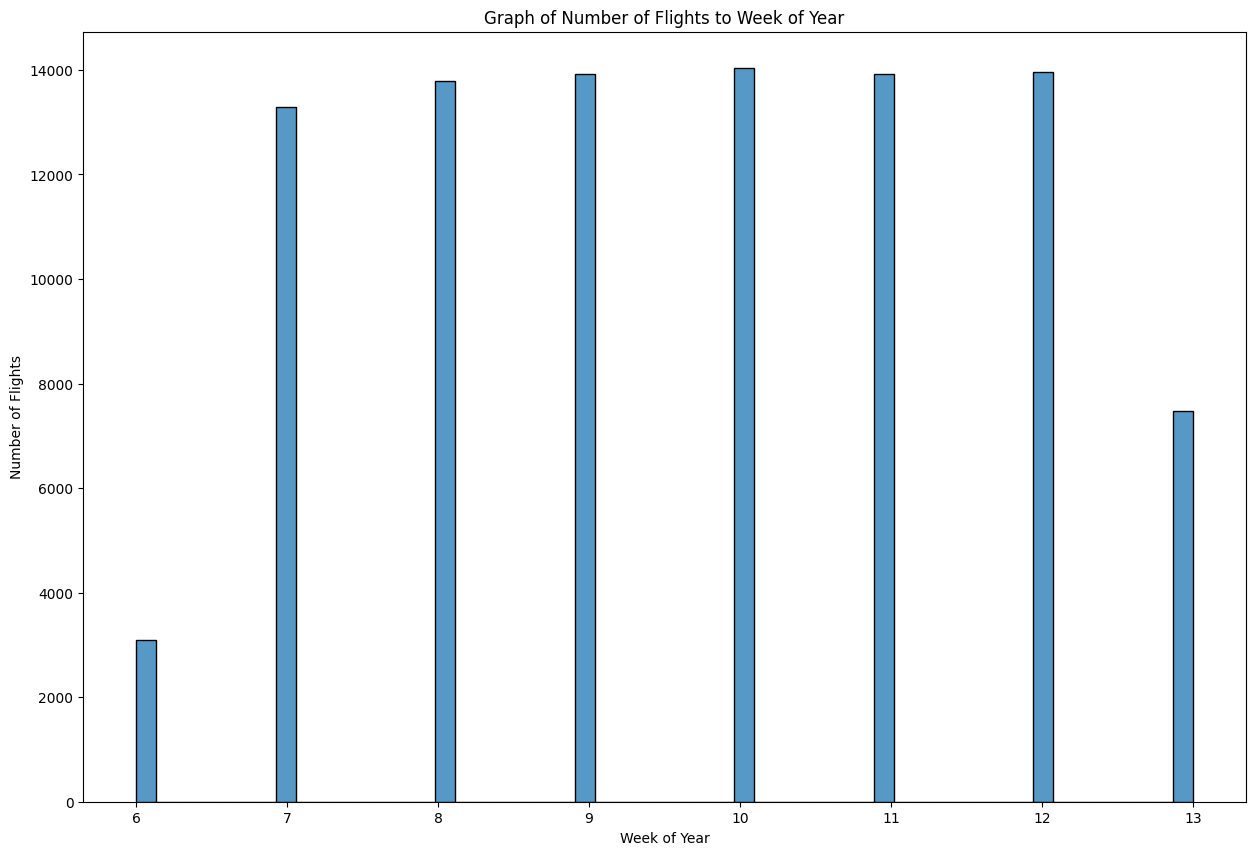

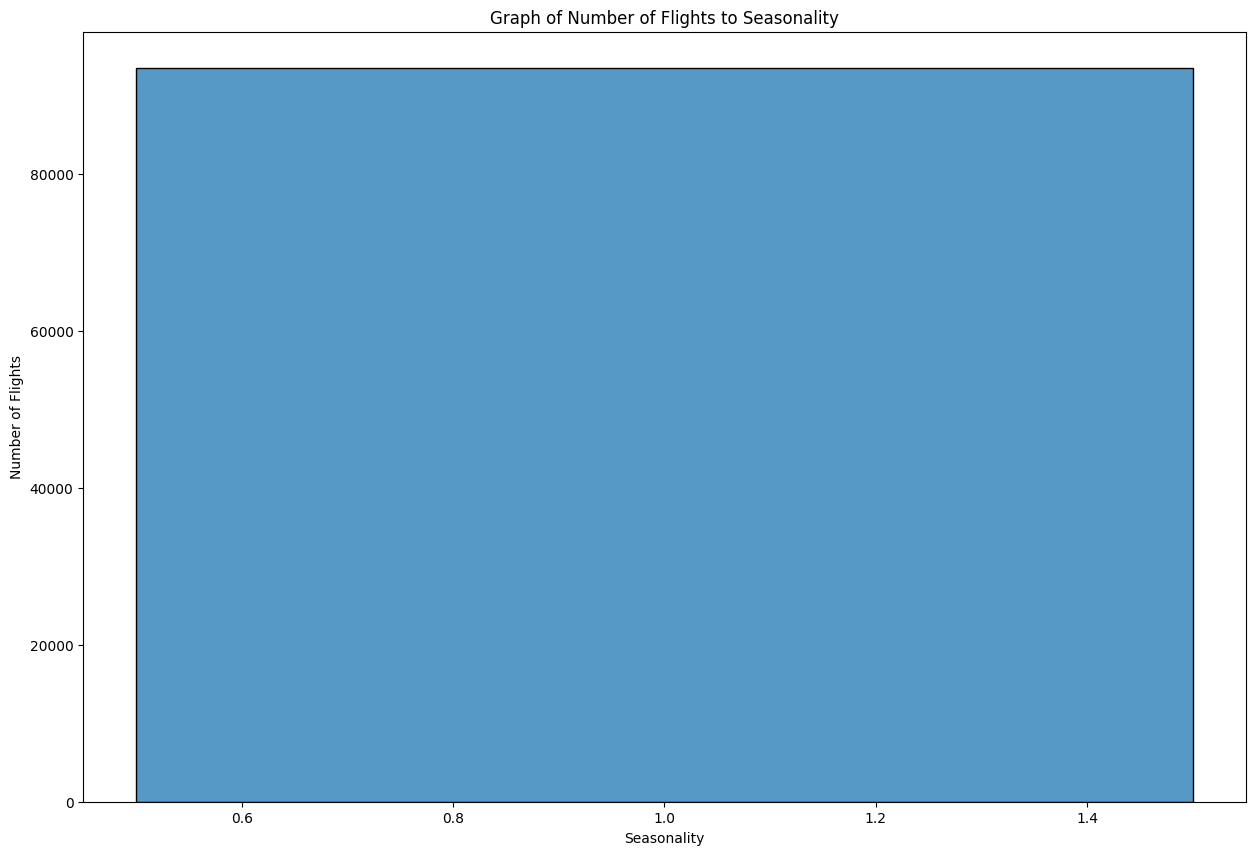

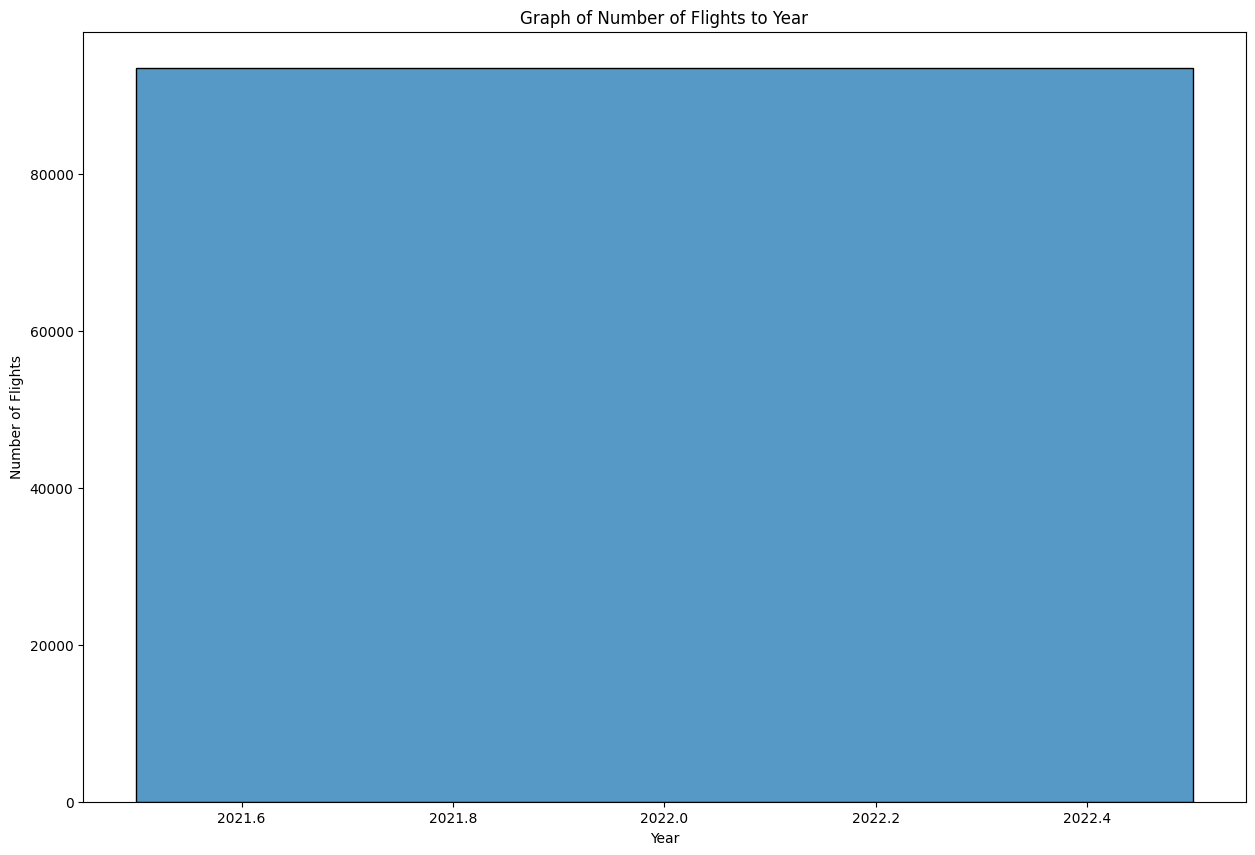

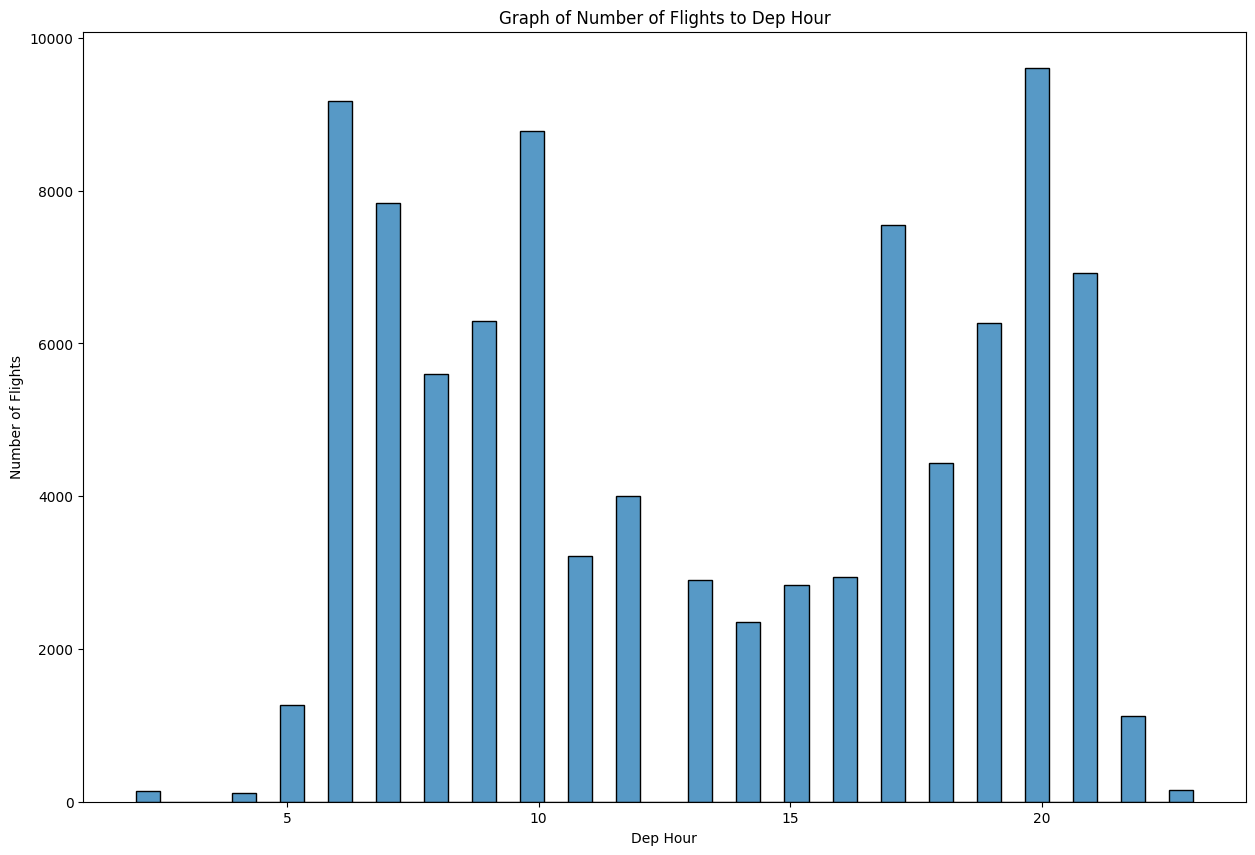

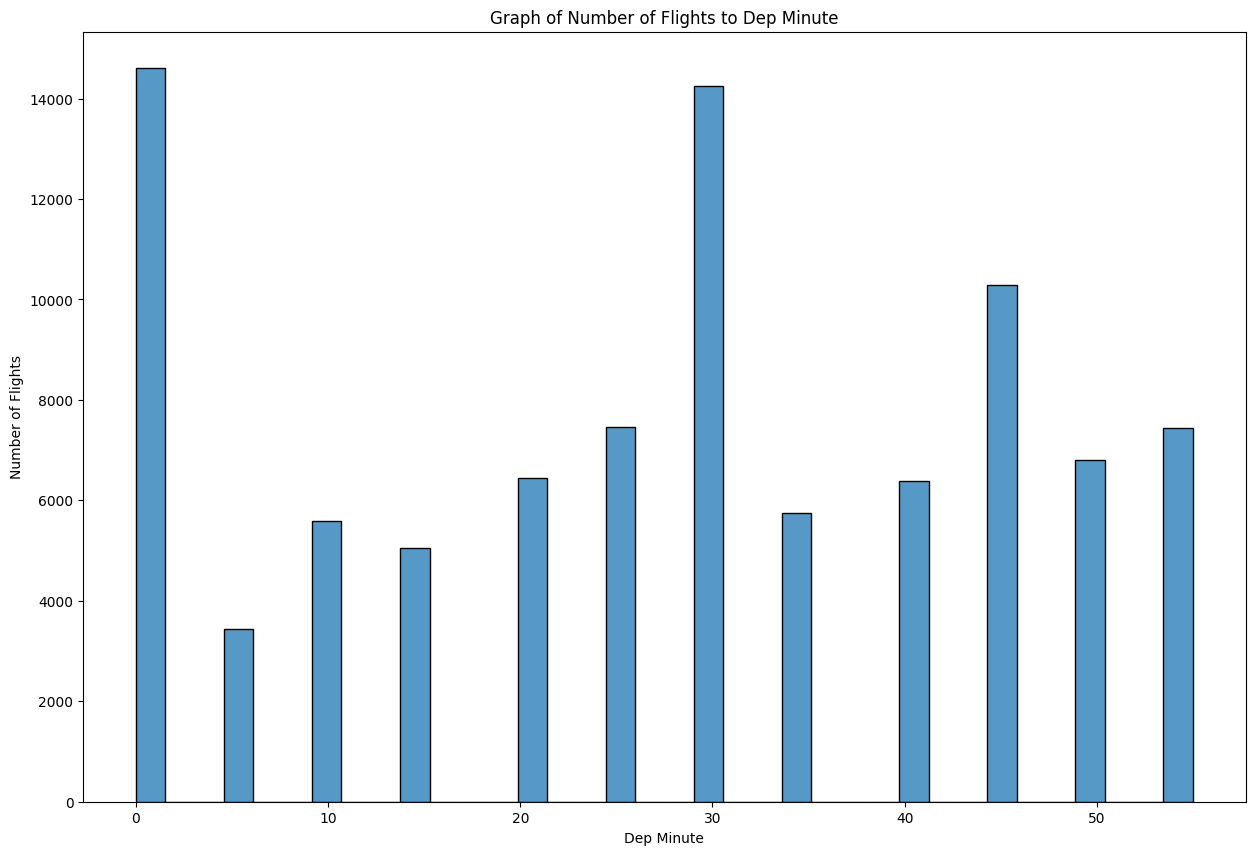

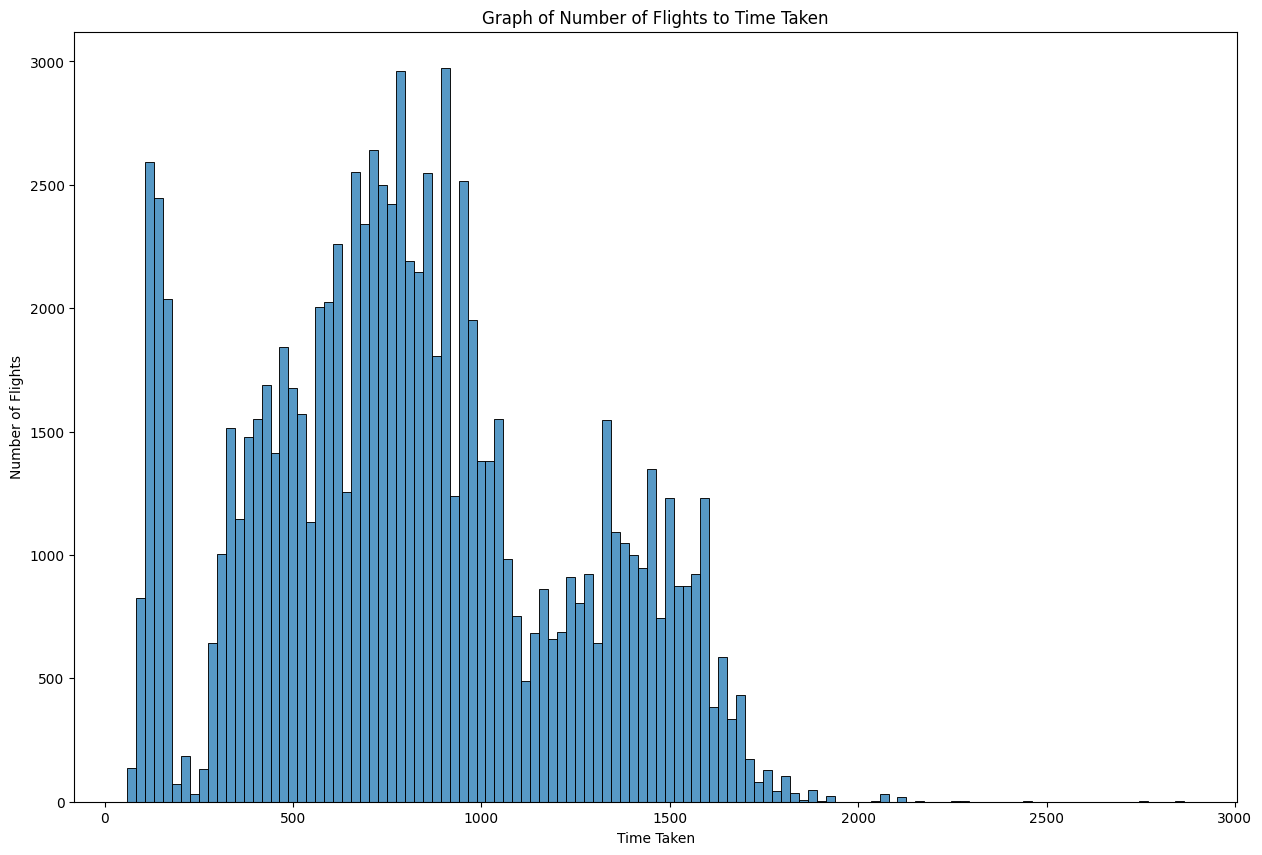

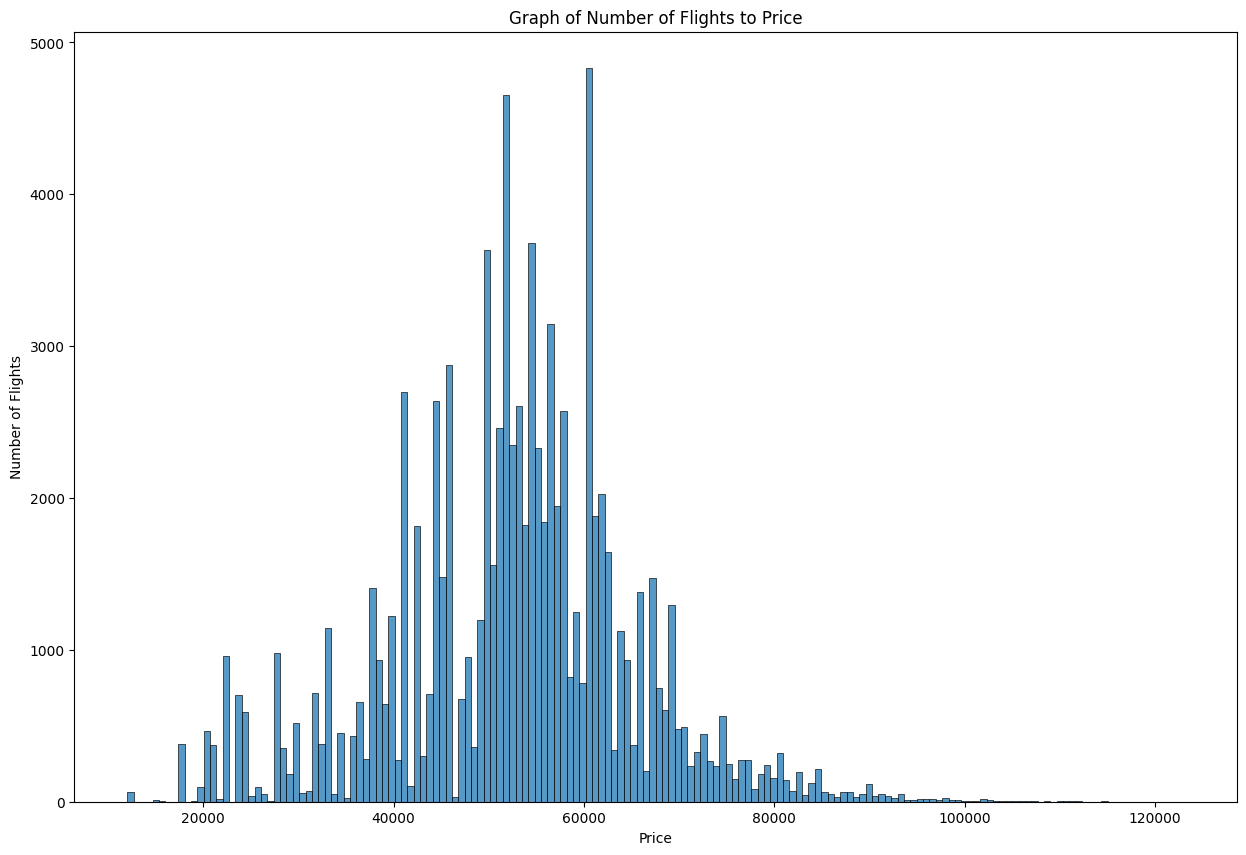

In [34]:
features_list = ['Day of Week', 'Week of Year', 'Seasonality', 'Year', 'Dep Hour', 'Dep Minute', 'Time Taken', 'Price']

for feature in features_list:
    fig = plt.figure(figsize=(15, 10))

    sns.histplot(data=data_encoded, x=feature)

    plot_title = "Graph of Number of Flights to " + feature

    plt.xlabel(feature)
    plt.ylabel('Number of Flights')
    plt.title(plot_title)

    plt.show()

#### From the graph of seasonality and year, we can see that all flights only have 1 value.
####
#### Hence, we will drop both of these features from the dataset.

### Remove Features of 'Seasonality' and 'Year'

In [35]:
data_encoded = data_encoded.drop('Seasonality', axis=1)

data_encoded = data_encoded.drop('Year', axis=1)

In [36]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Day of Week        93487 non-null  int32
 1   Week of Year       93487 non-null  int32
 2   Dep Hour           93487 non-null  int32
 3   Dep Minute         93487 non-null  int32
 4   Time Taken         93487 non-null  int32
 5   Price              93487 non-null  int32
 6   Airline_Air India  93487 non-null  int32
 7   Airline_Vistara    93487 non-null  int32
 8   From_Bangalore     93487 non-null  int32
 9   From_Chennai       93487 non-null  int32
 10  From_Delhi         93487 non-null  int32
 11  From_Hyderabad     93487 non-null  int32
 12  From_Kolkata       93487 non-null  int32
 13  From_Mumbai        93487 non-null  int32
 14  To_Bangalore       93487 non-null  int32
 15  To_Chennai         93487 non-null  int32
 16  To_Delhi           93487 non-null  int32
 17  To_Hyderabad

### Saving Cleaned Dataset (One-Hot-Encoded) as CSV

In [38]:
folder_name = "data"

file_name = "cleaned_data_noCategory.csv"

file_final_path = os.path.join(os.getcwd(), folder_name, file_name)

if os.path.exists(file_final_path):
    print(f"\nFile already exists. \nPlease check at the filepath: {file_final_path}\n")

else:
    data_encoded.to_csv(file_final_path, header=True, index=False)
    print(f"\nFile sucessfully saved at {file_final_path}\n")


File sucessfully saved at c:\Users\ADMIN\OneDrive\SHARED FILES\D3 Sem1\Statistical Learning\Project\data\cleaned_data_noCategory.csv



## Create Cleaned Dataset with Categories

### Only Drop 'Seasonality' and 'Year' Without Doing One-Hot-Encoding

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       93487 non-null  object
 1   From          93487 non-null  object
 2   To            93487 non-null  object
 3   Stop          93487 non-null  object
 4   Day of Week   93487 non-null  int32 
 5   Week of Year  93487 non-null  int32 
 6   Seasonality   93487 non-null  int32 
 7   Year          93487 non-null  int32 
 8   Dep Hour      93487 non-null  int32 
 9   Dep Minute    93487 non-null  int32 
 10  Time Taken    93487 non-null  int32 
 11  Price         93487 non-null  int32 
dtypes: int32(8), object(4)
memory usage: 5.7+ MB


In [40]:
data = data.drop('Seasonality', axis=1)
data = data.drop('Year', axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       93487 non-null  object
 1   From          93487 non-null  object
 2   To            93487 non-null  object
 3   Stop          93487 non-null  object
 4   Day of Week   93487 non-null  int32 
 5   Week of Year  93487 non-null  int32 
 6   Dep Hour      93487 non-null  int32 
 7   Dep Minute    93487 non-null  int32 
 8   Time Taken    93487 non-null  int32 
 9   Price         93487 non-null  int32 
dtypes: int32(6), object(4)
memory usage: 5.0+ MB


### Saving Cleaned Dataset (Category) as CSV

In [42]:
folder_name = "data"

file_name = "cleaned_data_Category.csv"

file_final_path = os.path.join(os.getcwd(), folder_name, file_name)

if os.path.exists(file_final_path):
    print(f"\nFile already exists. \nPlease check at the filepath: {file_final_path}\n")

else:
    data.to_csv(file_final_path, header=True, index=False)
    print(f"\nFile sucessfully saved at {file_final_path}\n")


File sucessfully saved at c:\Users\ADMIN\OneDrive\SHARED FILES\D3 Sem1\Statistical Learning\Project\data\cleaned_data_Category.csv



## Final Words and Notes

#### There are 2 cleaned datasets created in this process which are:
> 1. cleaned_data_noCategory.csv
>
> 2. cleaned_data_Category.csv
>
#### Both datasets are saved under the folder of "data".
####
#### These datasets suit different models which is up for you to judge personally. 
####
#### These datasets may still exists issues of distribution and inconsistency. PLEASE CHECK WITH VISUALIZATION GRAPHS PROVIDED. 
####
#### Use with caution and more pre-processing steps. 
####

#### Processes Performed on Both Datasets:
> 1. Missing Value Check                    --> Passed
>
> 2. Dropping Several Features              --> Flight code (ch & num), Arrival time, Year, Seasonality
>
> 3. Convert 'Date' feature to              --> Day of Week & Week of Year
>
> 4. Convert 'dep_time' feature to          --> Dep Hour, Dep Minute
>
> 5. Convert 'Price' feature to             --> Numerical from object
>
> 3. Reformat 'Stop' feature to 3 groups    --> 0, 1 & 2++
> 
#### Processes Performed on ONLY CATEGORY DATASET
> 1. One-Hot-Encoding                       --> Airline, From, To, Stop
>
> 2. Convert all features to datatype       --> Int32
>